<h2>Shallow problem

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
from sklearn.datasets import make_moons

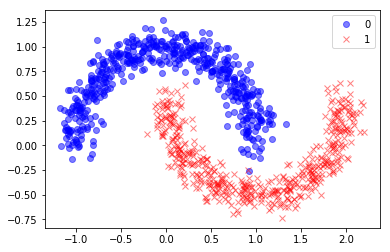

In [6]:
x, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [0]:
def plot_decision_boundary(model, x, y):
  amin, bmin = x.min(axis=0) - 0.1
  amax, bmax = x.max(axis=0) + 0.1
  hticks = np.linspace(amin, amax, 101)
  vticks = np.linspace(bmin, bmax, 101)

  aa, bb = np.meshgrid(hticks, vticks)
  ab = np.c_[aa.ravel(), bb.ravel()]

  c = model.predict(ab)
  cc = c.reshape(aa.shape)

  plt.figure(figsize=(12,8))
  plt.contour(aa, bb, cc, cmap='bwr', alpha=0.2)
  plt.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
  plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
  plt.legend(['0', '1'])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [0]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [0]:
inputs = Input(shape=(2,))

In [14]:
out_1 = Dense(4, activation='tanh')(inputs)
out_2 = Dense(2, activation='tanh')(out_1)
outputs = Dense(1, activation='sigmoid')(out_2)

In [0]:
model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=100, verbose=0)

In [19]:
result = model.evaluate(x_test, y_test)
result

300/300 [==============================] - 0s 201us/step


[0.0014794111579734212, 1.0]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

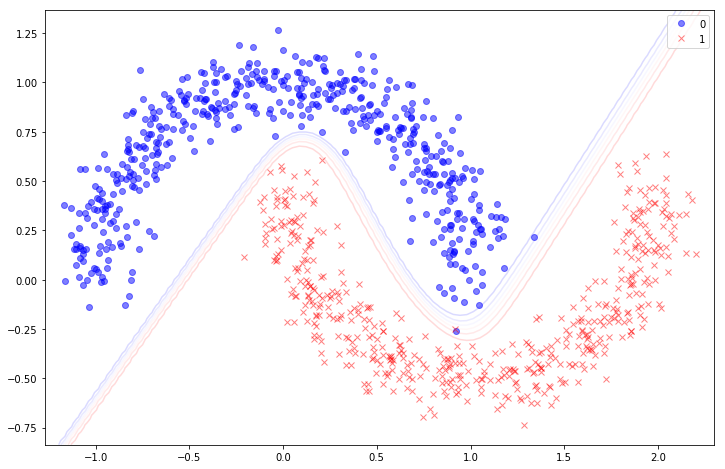

In [24]:
plot_decision_boundary(model, x, y)